I haven't coded for a while, particularly in data science. So, to ease back into it and refresh my skills, I'll start by solving some simple tasks. I'll begin with the basics, using the Iris Dataset from the sklearn library and applying logistic regression.

# Import Libraries

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# About Dataset
This dataset is about iris flowers.This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

I will download the dataset and see what is inside of the data.

In [6]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Preparing

So, the main idea is to predict the target names of the iris based on their features. X will be out independent variable while y dependent.

In [13]:
X = pd.DataFrame(iris.data)
X.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [15]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y = pd.DataFrame(iris.target)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Logistic Regression

I am splitting my data into training and test sets to facilitate further model development. The parameter 'test_size' determines the proportion of the dataset allocated to the test set.

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.01)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01)

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0,
       0])

# Evaluation Metrics

Now,time to check accuracyy and other needed metrics to see is my model working well

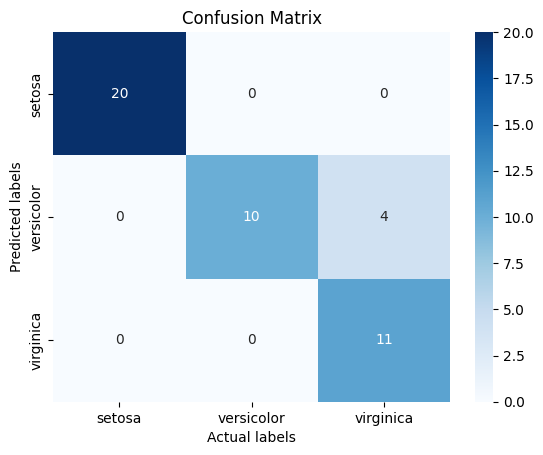

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

cfm = confusion_matrix(y_test,y_pred)
sn.heatmap(cfm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")
plt.title("Confusion Matrix")

plt.show()

So, the confusion matrix shows that my model predicted 20 *setosa* out of 20 correctly. But the 15 acutal *virginica* were correctly recognized in 11 cases but in 4 case a *viriginica* was taken to be a *veriscolor*.

In [31]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9111111111111111


In [33]:
precision = precision_score(y_test,y_pred, average='macro')
print("Precision:", precision)

Precision: 0.9111111111111111


In [34]:
recall = recall_score(y_test,y_pred,average='macro')
print("Recall:", recall)

Recall: 0.9047619047619048


# Report

* The accuracy of the model on the test set is 91%. This indicates the overall correctness of the predictions.

* The precision, recall are also important metrics to consider and in my case they are higher that the 90%. This metrics provided insight on the model's performance for each classes

* The confusion matrix helps visualize the model's performance in terms it correctness. Looking at the diagonal cells, we can see that the model performed best at classifying Iris Setosa flowers (15 out of 15) and worst at classifying Iris Virginica flowers (only 11 out of 15).

* Based on these metrics and visualizations, I can conclude that the model performs well on certain classes but struggles with others.

I will continue to conduct further analysis and make improvements in the future.
